In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [46]:
file = "dataset/diabetes.csv"

In [47]:
data = pd.read_csv(file)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
%matplotlib inline

In [8]:
result = data["Outcome"]
result

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

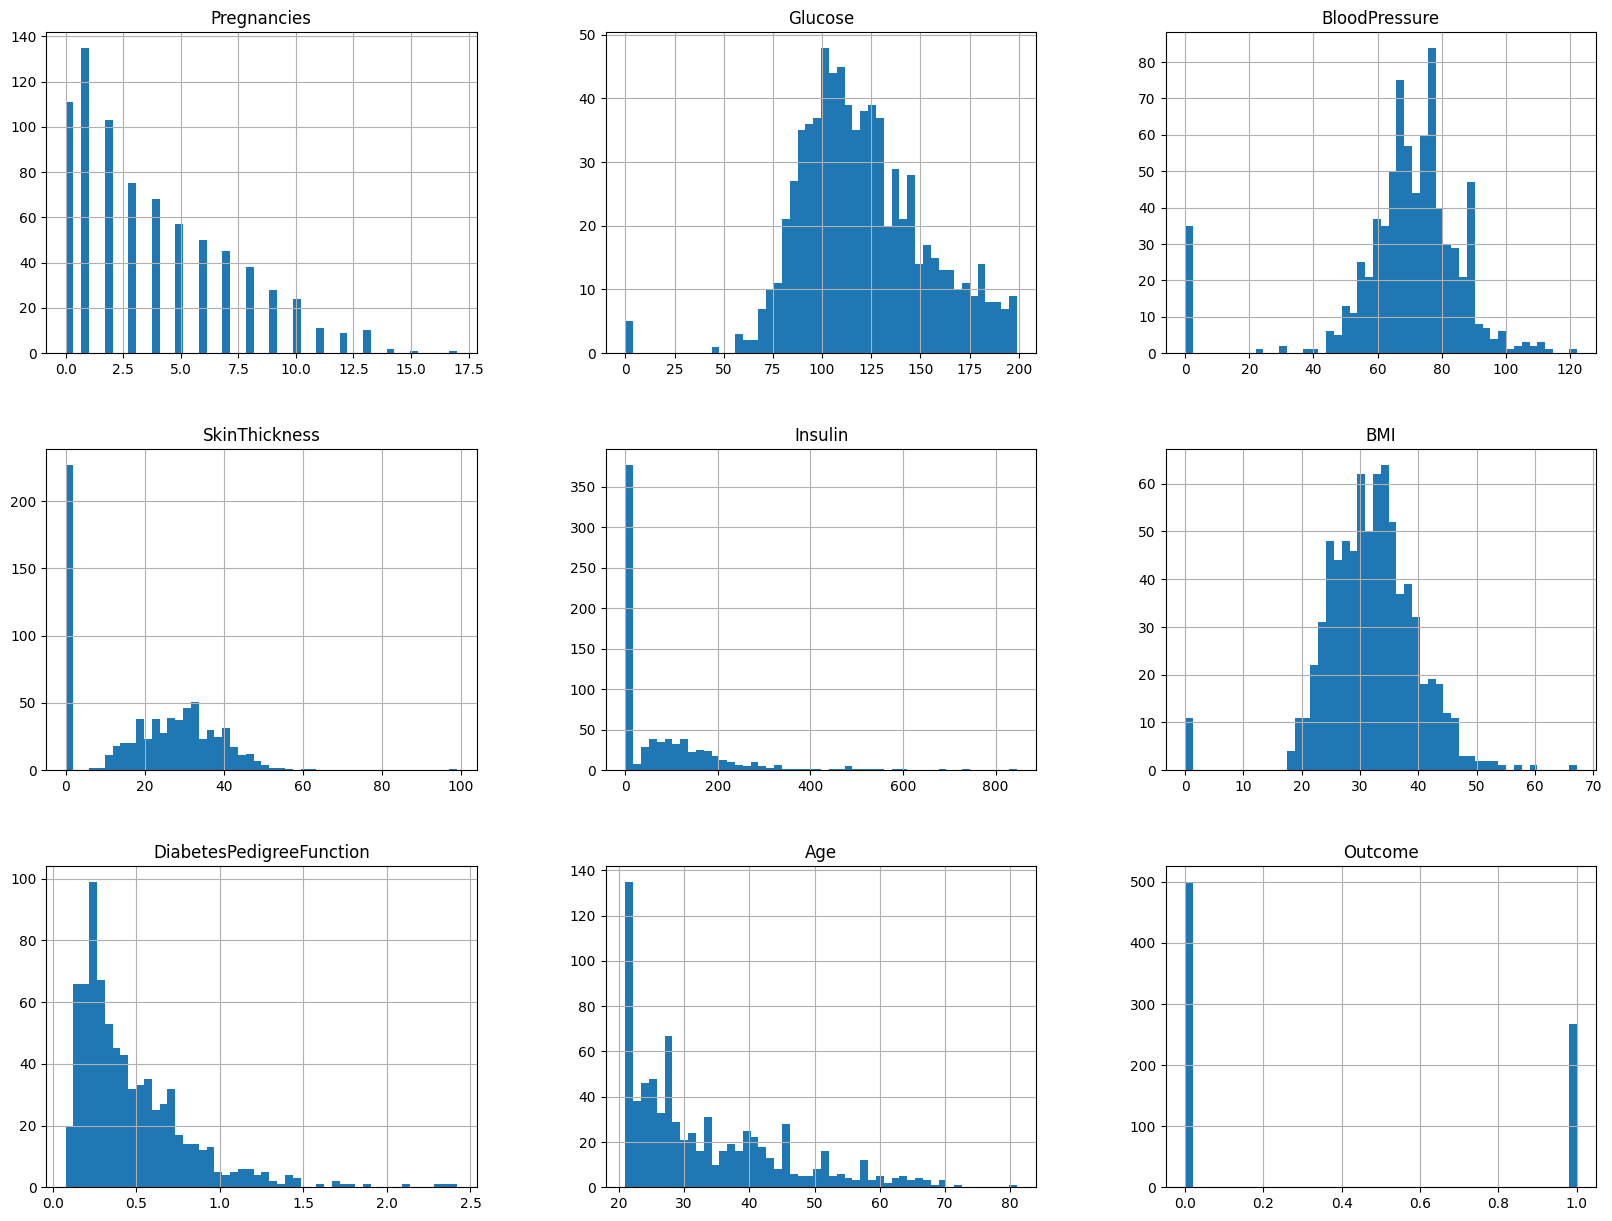

In [9]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [10]:
#написать что-то более релевантное
print("Median Blood Pressure range:", data.BloodPressure.min(), data.BloodPressure.max())
print("Housing median age range:", data.Age.min(),data.Age.max())
print("Median Glucose range:", data.Glucose.min(),data.Glucose.max())

Median Blood Pressure range: 0 122
Housing median age range: 21 81
Median Glucose range: 0 199


In [11]:
## Создание тестового набора данных

In [12]:
#упрощенный вариант train_test_split
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [13]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [14]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [15]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

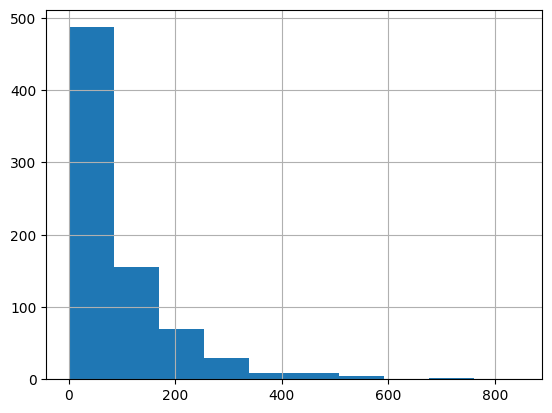

In [16]:
data.Insulin.hist();

In [17]:
data['Insulin_category'] = pd.cut(data['Insulin'],bins=[-1,50,100,150,200, np.inf],labels=[0,50,100,150,200])

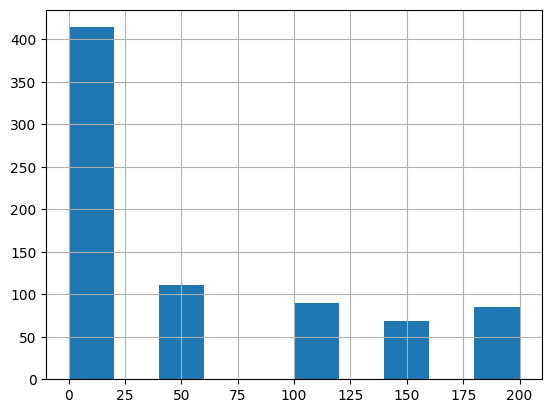

In [18]:
data.Insulin_category.hist();

In [19]:
#Стратификационная выборка

In [20]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [21]:
data['Insulin_category']

0        0
1        0
2        0
3       50
4      150
      ... 
763    150
764      0
765    100
766      0
767      0
Name: Insulin_category, Length: 768, dtype: category
Categories (5, int64): [0 < 50 < 100 < 150 < 200]

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['Insulin_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[600 735 606 403  65 743 651 529  54 439 231 423 701 297 318 590  69 719
 511 478  52 674 519  71 293 401 300 104 525 429  20 536 111 758  18 382
 274 168 670 246 661 664 460  16 114 180 404 539 583 637  95 535 107 358
 216 225 255 524 130 201 557 538 421  87 603 559 179 709 258 321 174 248
 586 270 502 602 194 276 227 329 554 599 372 430 177 431   6 320 608 433
 338 592  29 369 405 418 682 408 351 146 409 690 280 295 220  15 753 235
 278 688 491  88 163 448 468 301 462 214 199  42 198 131 681 451 654 518
 237 454 312 760 309 531 103 644 456 487 660 499 211 649 361 615 493 370
 614 435 135 192 476 724 389 371 206 124 232 415 331 463 191 138 245  26
 340  17 505 129 181  72 641 115 458 427 699 695  76 109 200 444 490 218
 571 150 706  78 546 310 125 400 598 715 696 171 407 299 561 640 542 680
 291 712 302 397 422 574 100 242 383 275 467 391 317  22 140 689 662 676
 202 669 442 446 533 605 631 655 679 509 500  49 386 638 591 632 236 322
 365 453  24 646 112 512 573 145 334 658 167 166  3

In [23]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Insulin_category",axis=1,inplace=True)

In [24]:
data = strat_train_set.copy()

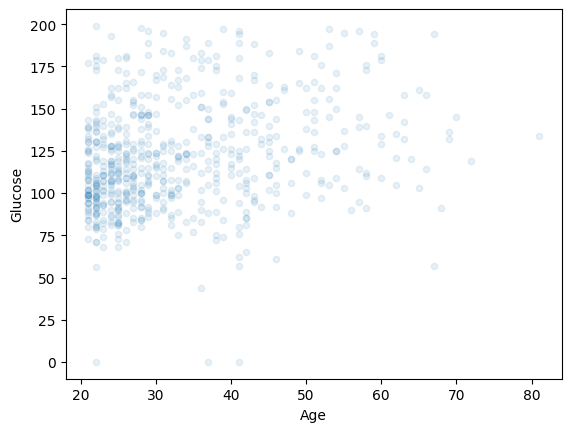

In [25]:
data.plot(kind='scatter',x='Age',y = 'Glucose',alpha = 0.1);

In [26]:
data.plot(kind='scatter',x='Age',y = 'latitude',alpha = 0.1,s=data['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

KeyError: 'population'

In [27]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125797,0.096145,-0.087851,-0.086348,0.020755,-0.010131,0.548336,0.207449
Glucose,0.125797,1.000000,0.139010,0.040769,0.344617,0.203206,0.127189,0.246531,0.466373
BloodPressure,0.096145,0.139010,1.000000,0.215675,0.090307,0.245833,0.082051,0.239128,0.025228
SkinThickness,-0.087851,0.040769,0.215675,1.000000,0.471123,0.411817,0.160912,-0.135864,0.061274
Insulin,-0.086348,0.344617,0.090307,0.471123,1.000000,0.205894,0.142037,-0.039353,0.149575
BMI,0.020755,0.203206,0.245833,0.411817,0.205894,1.000000,0.104810,0.014841,0.266708
DiabetesPedigreeFunction,-0.010131,0.127189,0.082051,0.160912,0.142037,0.104810,1.000000,0.057385,0.158865
Age,0.548336,0.246531,0.239128,-0.135864,-0.039353,0.014841,0.057385,1.000000,0.226488
Outcome,0.207449,0.466373,0.025228,0.061274,0.149575,0.266708,0.158865,0.226488,1.000000


In [28]:
corr_matrix['Glucose'].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.466373
Insulin                     0.344617
Age                         0.246531
BMI                         0.203206
BloodPressure               0.139010
DiabetesPedigreeFunction    0.127189
Pregnancies                 0.125797
SkinThickness               0.040769
Name: Glucose, dtype: float64

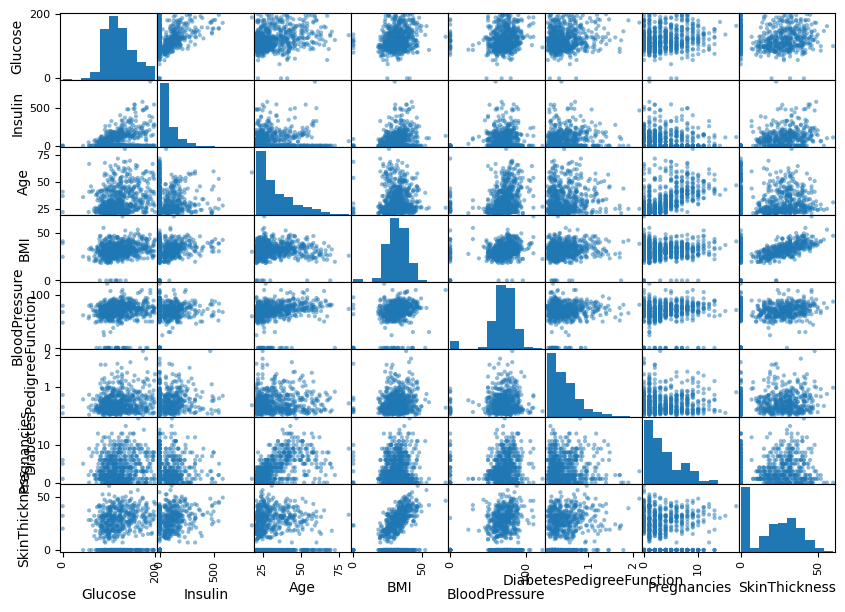

In [29]:
from pandas.plotting import scatter_matrix

attributes = ['Glucose','Insulin','Age','BMI','BloodPressure','DiabetesPedigreeFunction','Pregnancies','SkinThickness']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

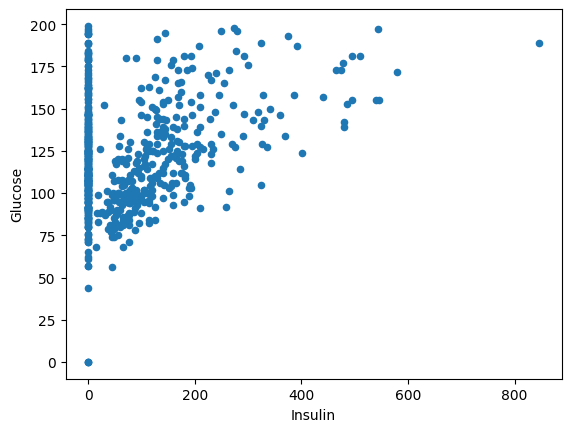

In [30]:
data.plot(kind='scatter',x='Insulin',y='Glucose',alpha=1)

In [31]:
#комбинирование признаков

In [32]:
# не уверен что есть в этом смысл при работе с данным набором данных

In [33]:
#работа с пропусками с использованием SimpleImputer

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # только для числовых признаков

In [48]:
data_num = data
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [36]:
X = imputer.transform(data_num)

In [37]:
data_tranformed = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_tranformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
600,1.0,108.0,88.0,19.0,0.0,27.1,0.400,24.0,0.0
735,4.0,95.0,60.0,32.0,0.0,35.4,0.284,28.0,0.0
606,1.0,181.0,78.0,42.0,293.0,40.0,1.258,22.0,1.0
403,9.0,72.0,78.0,25.0,0.0,31.6,0.280,38.0,0.0
65,5.0,99.0,74.0,27.0,0.0,29.0,0.203,32.0,0.0
...,...,...,...,...,...,...,...,...,...
44,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,0.0
360,5.0,189.0,64.0,33.0,325.0,31.2,0.583,29.0,1.0
564,0.0,91.0,80.0,0.0,0.0,32.4,0.601,27.0,0.0
251,2.0,129.0,84.0,0.0,0.0,28.0,0.284,27.0,0.0


In [ ]:
#я не до конца понял, есть ли необходимость в создании собственного трансформера

In [ ]:
#Масштабирование признаков

In [ ]:
#Конвееризация

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [50]:
data_num_transformed

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [41]:
#категориальных признаков нет, поэтому pipeline для них не нужен

In [42]:
#Обучение модели

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_num_transformed,result)

LinearRegression()

In [53]:
some_data = data.iloc[:5]
data_labels = result.iloc[:5]
data_prepared_some = pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [1.00000000e+00 1.66533454e-16 1.00000000e+00 5.55111512e-17
 1.00000000e+00]
Метки: [1, 0, 1, 0, 1]


In [56]:
from sklearn.metrics import mean_squared_error

data_prepared = pipeline.transform(data)
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(result, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

2.2154712163221363e-16


In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,result)

DecisionTreeRegressor()

In [58]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(result, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


In [ ]:
#Кросс валидация

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor,data_prepared,result,scoring='neg_mean_squared_error') # функция считает utility функцию или функцию качества, которая является противоположностью функции потерь

scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [0. 0. 0. 0. 0.]
Среднее: 0.0
Стандартное отклонение: 0.0


In [63]:
lin_scores = cross_val_score(model,data_prepared,result,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Оценки: [5.48329443e-16 3.54204149e-16 3.72380123e-16 4.81738578e-16
 5.19355601e-16 2.82202859e-16 4.26295377e-16 4.83065912e-16
 4.49894544e-16 9.02398873e-16]
Среднее: 4.819865458614698e-16
Стандартное отклонение: 1.5966602987060895e-16
